In [1]:
import numpy as np
import matplotlib.pylab as plt
import math
%matplotlib inline

# fixing random seed
np.random.seed(42)

# Linear regression

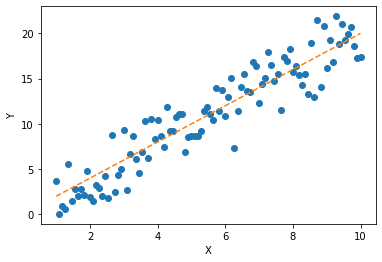

In [17]:
# Data generation
points = 100
k=2.

x = np.linspace(1,10, num=points)
y = k*x + np.random.normal(scale=2,size = (points))
y_true = k*x

plt.plot(x,y,'o')
plt.plot(x,y_true, '--')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [18]:
def power_features(x, power):
    return np.vstack([np.ones(x.shape)] + [x**n for n in np.arange(1,power+1)]).T

def compute_gradients(parameters, x, y):
    
    error = params @ x.T - y
    cost = 0.5*(error ** 2).mean()
    grads = (np.broadcast_to(error.reshape(-1,1), x.shape) * x).mean(axis=0)
    
    return grads, cost

def update(parameters, lr, x, y):
    
    grads, cost = compute_gradients(parameters, x, y)
    parameters += -lr * grads
    
    return parameters, cost

In [19]:
features = power_features(x,1)

params = np.random.normal(scale=0.001, size = features.shape[1])
lr = 0.01
costs = []
for step in range(10):
    
    params, cost = update(params, lr=lr, x = features, y = y)
    costs.append(cost)
    
y_pred = params @ features.T

In [24]:
(params @ features.T - y) * features

ValueError: operands could not be broadcast together with shapes (100,) (100,2) 

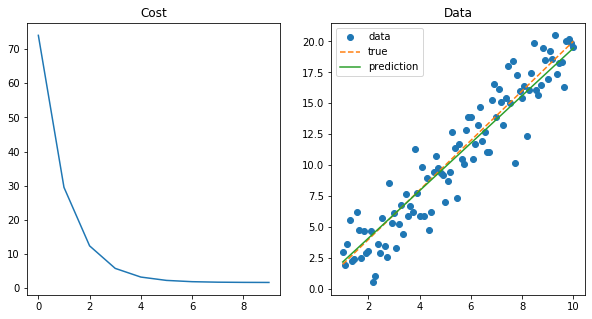

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(costs)
ax1.set_title('Cost')

ax2.plot(x,y,'o', label='data')
ax2.plot(x,y_true, '--', label='true')
ax2.plot(x,y_pred, label='prediction')
ax2.set_title('Data')
ax2.legend()

# Linear classification

In [11]:
def norm(x):
    
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x - mean) / std

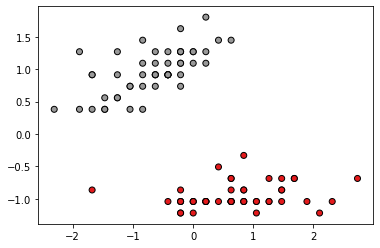

In [12]:
from sklearn import datasets

iris = datasets.load_iris()
selector = iris.target != 2 
X = iris.data[:, [1,3]][selector] 

# Data normalization
x = norm(X)
y = iris.target[selector]
y[y==2] = 0 
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

In [13]:
def power_features(x, power):
    return np.hstack([np.ones((x.shape[0],1))] + [x**n for n in np.arange(1,power+1)])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_gradients(parameters, x, y):
    
    z = params @ x.T
    
    prob = sigmoid(z)    
    cost = -(y * np.log(prob) + (1-y) * np.log(1 - prob)).mean()    
    gradient = ((z - y).reshape(x.shape[0],1) * x).mean(axis=0)
        
    return gradient, cost

def update(parameters, lr, x, y):
    
    grads, cost = compute_gradients(parameters, x, y)
    parameters += -lr * grads
    
    return parameters, cost

def plot_ll_model(costs, parameters, x, y, limits_x=(-3,3), limits_y=(-3,3), bins = 50):
    
    x_vec = np.linspace(*limits_x, bins)
    y_vec = np.linspace(*limits_y, bins)
    xx, yy = np.meshgrid(x_vec, y_vec)
    Z = np.vstack([np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]).T
    
    prediction = (parameters @ Z.T).reshape(xx.shape)
    
    plt.close()
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

    ax1.plot(costs)
    
    pcm = ax2.pcolormesh(x_vec,x_vec,prediction, cmap='coolwarm',shading='gouraud')
    pcm = ax2.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    fig.colorbar(pcm, ax=ax2)
    
    plt.show()

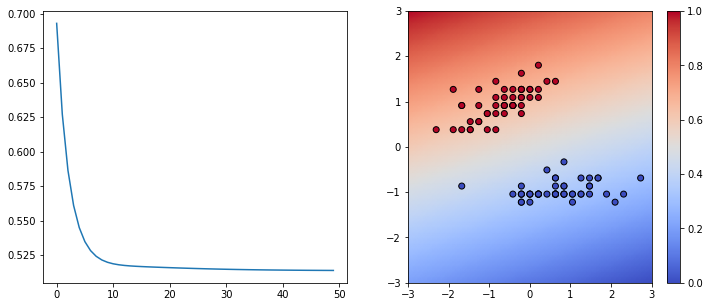

In [14]:
features = power_features(x,1)
params = np.random.normal(scale=0.001, size = features.shape[1])
lr = 0.2
costs = []

for step in range(50):
    
    params, cost = update(params, lr=lr, x = features, y = y)
    costs.append(cost)
plot_ll_model(costs, params, x, y, limits_x=(-3,3), limits_y=(-3,3), bins = 50)

In [15]:
x,y = datasets.make_circles(n_samples=100, noise=0.05, random_state=None, factor=0.5)

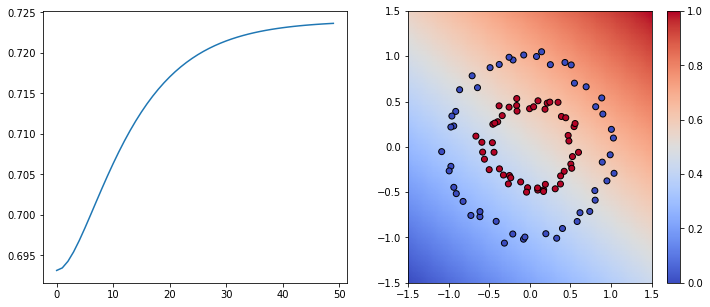

In [16]:
features = np.hstack([np.ones((x.shape[0],1)),x])
params = np.random.normal(scale=0.001, size = features.shape[1])
lr = 0.1

costs = []
for step in range(50):
    
    params, cost = update(params, lr=lr, x = features, y = y)
    costs.append(cost)
    
plot_ll_model(costs, params, x, y, limits_x=(-1.5,1.5), limits_y=(-1.5,1.5), bins = 50)

# HW

Do nonlinear binary data classification for circles dataset above